### Introduce the problem

Goal: use clustering to discover natural groups of songs and investigate whether these groups relate to song popularity.

- Can unsupervised clustering reveal distinct song types (e.g., upbeat/danceable vs. mellow/instrumental)?

Why this matters: identifying song clusters can help streaming services or labels understand content patterns, improve recommendation strategies, and target marketing or playlist creation.


### What is clustering and how it works

Clustering is an unsupervised learning technique that groups data points so that points in the same cluster are more similar to each other than to points in other clusters. It’s used to discover structure in unlabeled data.

- K-means (centroid-based)
    - k centroids and assign each point to the nearest centroid, then update centroids as the mean of assigned points; repeat until convergence.
- Agglomerative hierarchical clustering (bottom-up)
    - start with each point as its own cluster; iteratively merge the two closest clusters (based on a linkage criterion like ward/average/complete) until a stopping condition is reached. Results can be visualized with a dendrogram.

### Introduce the data
Source: Kaggle — Song Popularity Dataset
Rows: 18,835 songs.

- song_name — string identifier (drop for clustering; keep for interpreting clusters).

- song_popularity — integer (0–100 likely) — a label we can use for cluster validation / interpretation.

- song_duration_ms — integer, duration in milliseconds (suggest convert to seconds or minutes).

- acousticness — float [0,1], likelihood song is acoustic.

- danceability — float [0,1], how suitable for dancing.

- energy — float [0,1], intensity and activity.

- instrumentalness — float [0,1], likelihood of no vocals.

- key — int (0–11), musical key (circular; 0=C, 1=C♯, …).

- liveness — float [0,1], likelihood of audience being present (live recording).

- loudness — float (dB, negative values typical) — overall loudness.

- audio_mode — int (0/1) indicating minor(0)/major(1) mode.

- speechiness — float [0,1], presence of spoken words.

- tempo — float, beats per minute (BPM).

- time_signature — int, beats per bar (usually 3,4,5).

- audio_valence — float [0,1], musical positiveness (happy vs sad)

### Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kdiza\Downloads\archive (6)\song_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [4]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


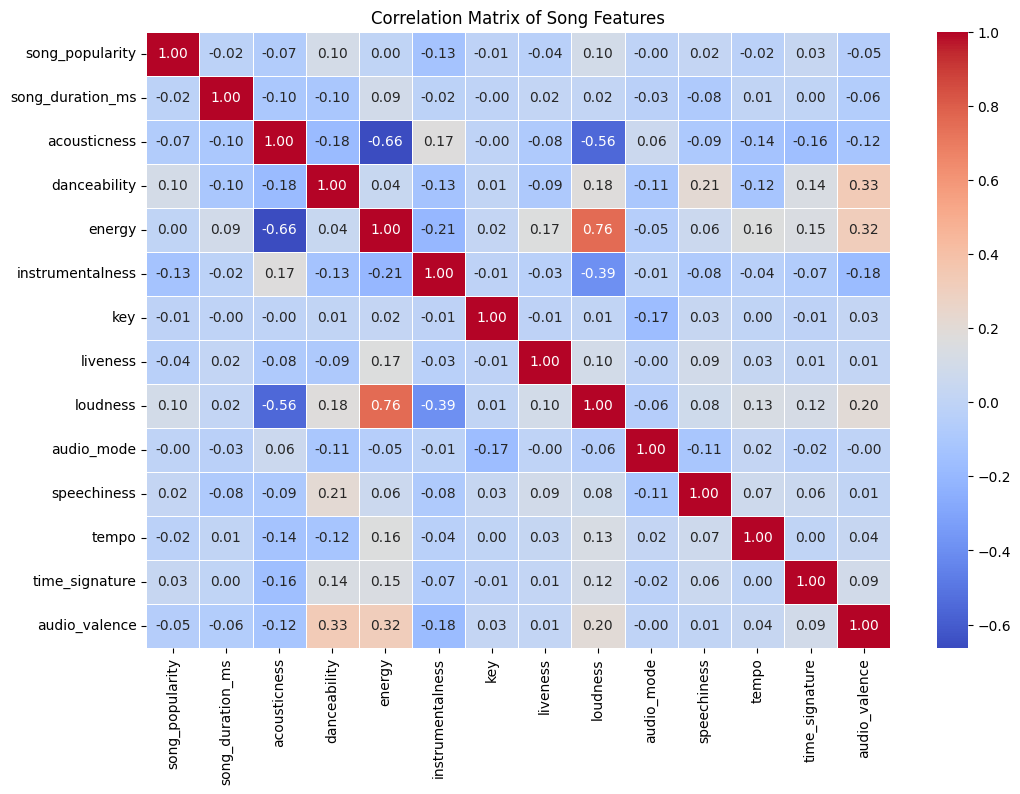

In [5]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Song Features")
plt.show()

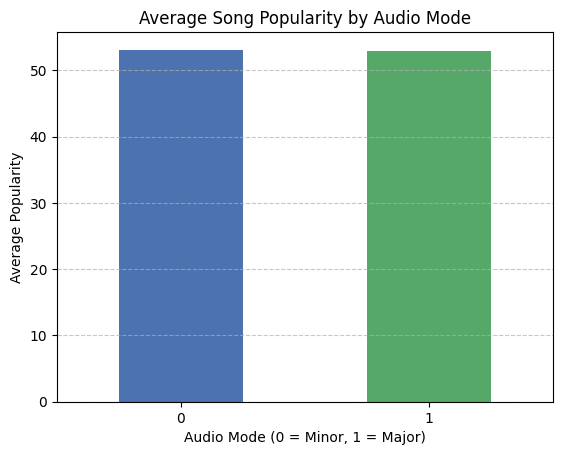

In [6]:
mode_popularity = df.groupby("audio_mode")["song_popularity"].mean()

# Plot
mode_popularity.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Average Song Popularity by Audio Mode")
plt.xlabel("Audio Mode (0 = Minor, 1 = Major)")
plt.ylabel("Average Popularity")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

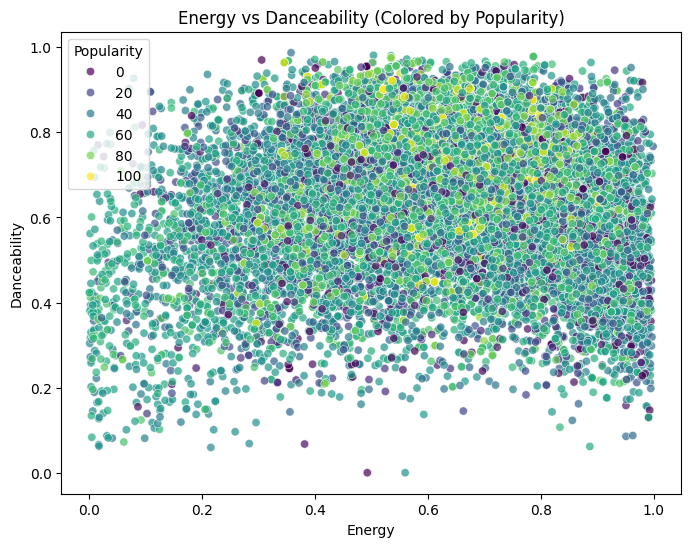

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="energy",
    y="danceability",
    hue="song_popularity",
    palette="viridis",
    alpha=0.7
)
plt.title("Energy vs Danceability (Colored by Popularity)")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.legend(title="Popularity", loc="best")
plt.show()

# Preproccessing


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df = df.drop(columns=["song_name"])

# Convert duration from milliseconds to seconds (easier to interpret)
df["duration_sec"] = df["song_duration_ms"] / 1000
df = df.drop(columns=["song_duration_ms"])

# --- Circular encoding for key ---
# Converts the musical key (0–11) to two continuous features preserving circularity
df["key_sin"] = np.sin(2 * np.pi * df["key"] / 12)
df["key_cos"] = np.cos(2 * np.pi * df["key"] / 12)
df = df.drop(columns=["key"])

popularity = df["song_popularity"]
df = df.drop(columns=["song_popularity"])

# --- Scaling ---
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Recreate a scaled DataFrame with the same column names
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

print("✅ Preprocessing complete! Shape:", scaled_df.shape)
scaled_df.head()

✅ Preprocessing complete! Shape: (18835, 14)


,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,duration_sec,key_sin,key_cos
0,-0.876374,-0.876400,0.172845,-0.351913,-0.838658,0.875829,0.769418,-0.696514,1.601565,0.136944,-0.220610,0.736757,-1.238426,-0.754506
1,-0.859818,-0.582880,0.971555,-0.352046,-0.497639,0.271815,-1.299684,-0.501066,-0.550858,0.136944,-0.645751,-0.021350,1.571165,-0.082289
2,-0.867195,0.661389,-0.850065,1.665241,0.523333,-0.099423,0.769418,-0.219391,0.097788,0.136944,-0.833793,0.225786,0.065510,1.262146
3,-0.804053,-1.163539,1.518042,-0.336025,-0.539312,0.655594,0.769418,0.046954,0.047742,0.136944,-1.348867,-0.021350,0.065510,1.262146
4,-0.892189,-1.189062,0.565194,-0.352046,-0.462913,0.622415,0.769418,-0.678310,1.773991,0.136944,0.188178,0.093752,-1.238426,0.589929
